For the Data Science 100 class my team and I will be working on analyzing the data collected by a reaserch group in the Computer Science program at UBC. The data was collected from a MineCraft server called PLAICraft, the specifica data we will be using is in two files: the "players" file which includes:
- Experience level, (Amateur, Regular, Pro or Veteran)
- Whether or not they have a subscription, (True or False value)
- A hashed email,  (Character)
- The amount of played hours on the server, 
- Name, (Character)
- Gender, (Character)
- Age, (Character)
- Individualld
- Organization name
The second file is the "sessions" file which indludes:
- The hashed email, (Character)
- Start-time of sessions (Includes date and time)
- End-time of sessions, (Includes date and time)
- The original start time
- Original end time.
 
The question my team and I will be focusing on is question 1: "We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts."
In order to answer the question my team will be using both data sets mainly focusing on the "players" data set to get the demographic data such as name, age and gender and then we will use the hashed email to identify the palyers data and pair it to the played sessions in the data "session" which will tell us the amount of times these players were logged in for. This will help us answer the question by seeing the main similarities in demographic between the players that spend the most time in the server.
Some problems we may encounter with the data is that matching the hashed emails with the sessions played might be difficult so it might be more convenient to just used the overall played hours on the "players" data. We will also need to tidy the data by removing the columns with no infomation or no valuable information such as the played hours being 0.0, the tidying will be done below.
The method we might use could be reading the data, tidying it, selectiing only relevant variables and using a model that will take the hours played and pair it to demogrphics, then the model will be trained in order to predict the future played hours of a new player depending on the demographic data provided and using k-nn regression and classification our model will give accurate predictions, then we will test the model on our data, the split will be 75% for training the data, we will use a 5 vfold, and 25% for testing the model. Our method should take care of everything we would need to properly answer the question but couls be limited due to randomization of identifiable information such as name and email data, however we still think our method will appropriately answer the question with the neccesary parameters.

In [2]:
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(repr)
sessions <- read_csv("https://raw.githubusercontent.com/hpapiez/DSCI100-Project/refs/heads/main/sessions.csv")
players <- read_csv("https://raw.githubusercontent.com/hpapiez/DSCI100-Project/refs/heads/main/players.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
tidy_sessions <- sessions |>
                select(hashedEmail, start_time, end_time)
tidy_sessions 

hashedEmail,start_time,end_time
<chr>,<chr>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49


In [4]:
tidy_players <- players |>
                select(experience, subscribe, hashedEmail, played_hours, name, gender, age) |>
                filter(played_hours > 0.0)
tidy_players

experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17


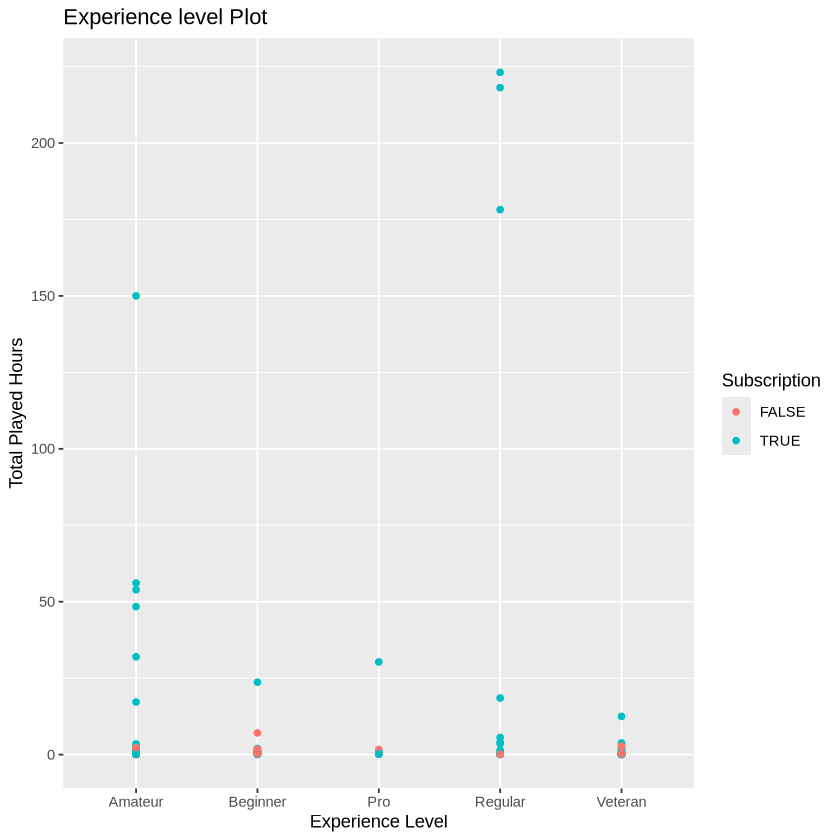

In [5]:
experience_plot <- tidy_players |>
    ggplot(aes(x= experience, y= played_hours, color=subscribe)) +
    geom_point()+
    labs(x= "Experience Level", y= "Total Played Hours", color= "Subscription") +
    ggtitle("Experience level Plot")
experience_plot

This plot above shows the total hours played by people depending on their experience level, and we can see that regular players and amateur players tend to spend more hours playing MineCraft, as well as who is subscribed.

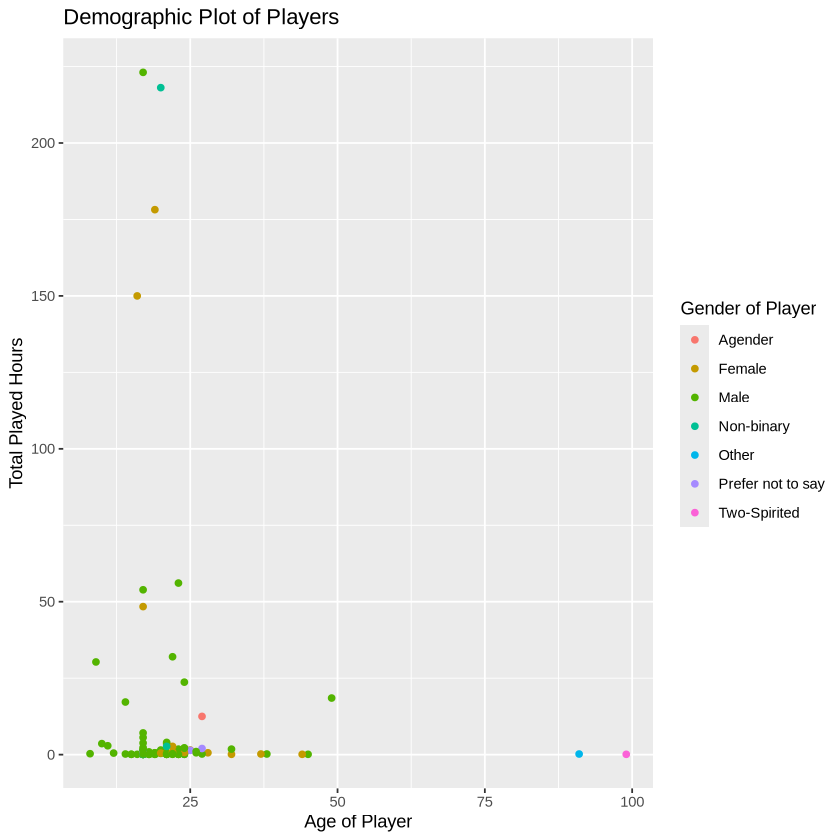

In [6]:
demographic_plot <- tidy_players |>
    ggplot(aes(x= age, y= played_hours, color=gender)) +
    geom_point()+
    labs(x= "Age of Player", y= "Total Played Hours", color= "Gender of Player") +
    ggtitle("Demographic Plot of Players")
demographic_plot

This graph helps us observe some of the demographic information of the data such as the age and gender of the palyer and compares it to the number of ours played.

In [7]:
small_players_sample <- slice_sample(tidy_players, n=10)
small_players_sample

experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,fb0005032363ec3b30c2ae668f78f5076b7e77de0c6a249e924eee608cd0a1fa,3.5,Madison,Female,21
Pro,FALSE,060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,0.4,Lyra,Male,21
Regular,FALSE,8e98b6db2053af0bc0e62cd55bcea5a08f23986dec3d02ca520ea039517e6744,0.1,Sam,Male,18
Beginner,TRUE,aea049eaa7cb10db386a62990220d205ceb2a4c473cae3ec7bab107278c26559,0.2,Aarav,Prefer not to say,17
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Beginner,FALSE,42eafe96ed5c1684e3b5cc614d1b01a117173d3ec6898abcf1177d9822bd39f7,0.3,Ariana,Female,17
Regular,TRUE,71e724778a28bb0ebbdacb1328944dfef427525466b012b66e7554a65e401a16,0.2,Carmen,Male,14
Amateur,TRUE,8af6e04a9067b009303e36cf39f7e7d53f9473e74b4633876ddd79769158b665,0.1,Zelda,Male,23


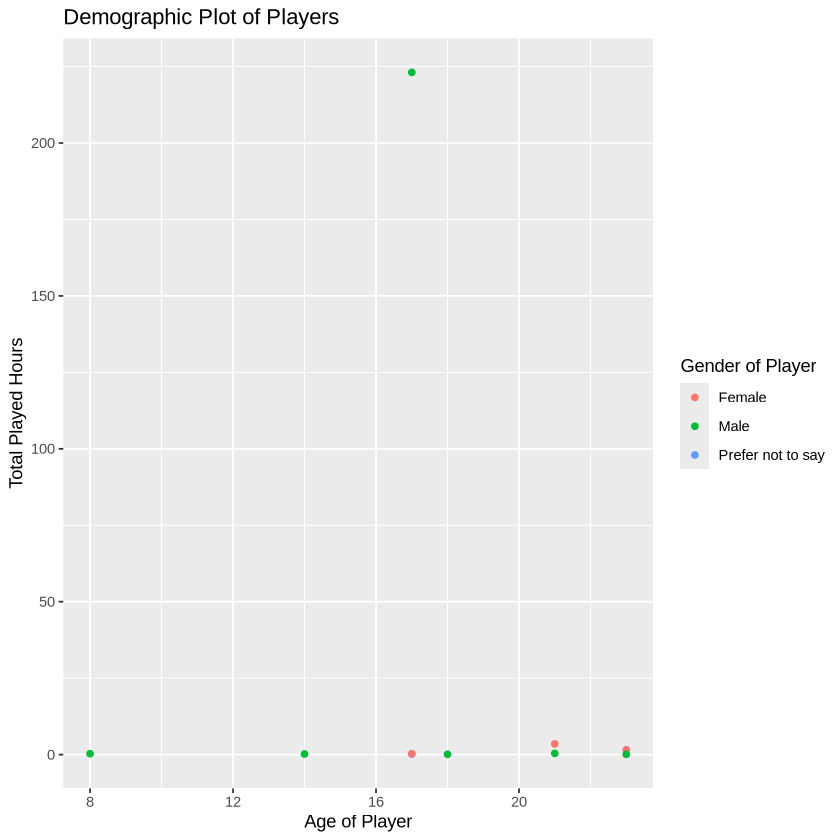

In [8]:
small_demographic_plot <- small_players_sample |>
    ggplot(aes(x= age, y= played_hours, color=gender)) +
    geom_point()+
    labs(x= "Age of Player", y= "Total Played Hours", color= "Gender of Player") +
    ggtitle("Demographic Plot of Players")
small_demographic_plot

In [10]:
players_split <- initial_split(tidy_players, prop = 0.75, strata = age)
players_train <- training(players_split)
players_test <- testing(players_split)

In [19]:
players_recipe <- recipe(played_hours ~ age, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

players_vfold <- vfold_cv(players_train, v = 5, strata = age)

players_wkflw <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec)

players_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [20]:
gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 3))

players_results <- players_wkflw |>
  tune_grid(resamples = players_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

players_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,45.17964,5,9.335373,Preprocessor1_Model01
4,rmse,standard,43.19583,5,7.414970,Preprocessor1_Model02
7,rmse,standard,40.16838,5,9.101382,Preprocessor1_Model03
10,rmse,standard,40.70780,5,8.515097,Preprocessor1_Model04
13,rmse,standard,41.46654,5,8.089595,Preprocessor1_Model05
16,rmse,standard,40.00848,5,8.800986,Preprocessor1_Model06
19,rmse,standard,39.20583,5,9.401024,Preprocessor1_Model07
22,rmse,standard,39.33853,5,9.452326,Preprocessor1_Model08
25,rmse,standard,38.49079,5,9.437837,Preprocessor1_Model09


In [21]:
players_min <- players_results |>
  filter(mean == min(mean))

players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
25,rmse,standard,38.49079,5,9.437837,Preprocessor1_Model09


In [22]:
kmin <- players_min |> pull(neighbors)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  fit(data = players_train)

players_summary <- players_fit |>
  predict(players_test) |>
  bind_cols(players_test) |>
  metrics(truth = age, estimate = .pred) |>
  filter(.metric == 'rmse')
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,12.95467


In [25]:
age_prediction_grid <- tibble(
    age = seq(
        from = tidy_players |> select(played_hours) |> min(),
        to = tidy_players |> select(played_hours) |> max(),
        by = 10
    )
)
players_preds <- players_fit |>
  predict(age_prediction_grid) |>
  bind_cols(age_prediction_grid)

plot_final <- ggplot(tidy_players, aes(x = played_hours, y = age)) +
  geom_point(alpha = 0.4) +
  geom_line(data = players_preds,
            mapping = aes(x = played_hours, y = .pred),
            color = "steelblue",
            linewidth = 1) +
  xlab("Total of Played Hours") +
  ylab("Age of Player") +
  scale_y_continuous(labels = dollar_format()) +
  ggtitle(paste0("K = ", kmin)) +
  theme(text = element_text(size = 12))

plot_final

ERROR while rich displaying an object: Error in `geom_line()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 2nd layer.
Caused by error:
! object 'played_hours' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_ha

In [ ]:
plot_final <- ggplot(tidy_players, aes(x = played_hours, y = age)) +
  geom_point(alpha = 0.4) +
  geom_line(data = players_preds,
            mapping = aes(x = played_hours, y = .pred),
            color = "steelblue",
            linewidth = 1) +
  xlab("Total of Played Hours") +
  ylab("Age of Player") +
  scale_y_continuous(labels = dollar_format()) +
  ggtitle(paste0("K = ", kmin)) +
  theme(text = element_text(size = 12))

plot_final